In [124]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import numpy as np
from numpy import array

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.cluster import KMeans

import time

import pickle

# Utility Functions

In [101]:
def print_cluster_metrics(truth_labels,cluster):
    
    homogeneity = metrics.homogeneity_score(truth_labels, cluster.labels_)
    completeness = metrics.completeness_score(truth_labels, cluster.labels_)
    v_measure = metrics.v_measure_score(truth_labels, cluster.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(truth_labels, cluster.labels_)
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(truth_labels, cluster.labels_)

    print("Homogeneity Score: %f" % homogeneity)
    print("Completeness Score: %f" % completeness)
    print("V-Measure Score: %f" % v_measure)
    print("Adjusted Rand Index: %f" % adjusted_rand_index)
    print("Adjusted Mutual Information: %f" % adjusted_mutual_info)

# Prepare Data

In [102]:
computer_technology_subclasses = ['comp.graphics',
                                  'comp.os.ms-windows.misc',
                                  'comp.sys.ibm.pc.hardware',
                                  'comp.sys.mac.hardware']

recreational_activity_subclasses = ['rec.autos',
                                    'rec.motorcycles',
                                    'rec.sport.baseball',
                                    'rec.sport.hockey']

categories = computer_technology_subclasses + recreational_activity_subclasses

In [103]:
dataset = fetch_20newsgroups(subset='all',categories=categories, shuffle=True, 
                             random_state=42, remove=('headers', 'footers'))

dataset_binary_target = [0 if t<4 else 1 for t in dataset.target]

In [106]:
# Generate TF-IDF Data, with min_df=3, removed stop words, no stemming
vectorizer = CountVectorizer(min_df=3, stop_words='english')
X_counts = vectorizer.fit_transform(dataset.data)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Print the shape of the datasets
print("QUESTION 1: Report the dimensions of the TF-IDF matrix you get")
print('TF-IDF Shape:',X_tfidf.shape)


QUESTION 1: Report the dimensions of the TF-IDF matrix you get
TF-IDF Shape: (7882, 23522)


# Cluster With K-Means (k=2)

In [107]:
# Apply K-means clustering with k=2 using the TF-IDF data. Use random_state=0, max_iter >= 1000, n_init>=30.
N_CLUSTERS = 2
RANDOM_STATE = 0
MAX_ITER = 1000
N_INIT = 30

km_2 = KMeans(n_clusters=N_CLUSTERS,random_state=RANDOM_STATE,max_iter=MAX_ITER,n_init=N_INIT)
start = time.time()
km_2.fit(X_tfidf)
print("Finished clustering with %i seeds in %f seconds" % (N_INIT, time.time()-start))


Finished clustering with 30 seeds in 222.077626 seconds


In [109]:
print("QUESTION 2: Show Contingency Matrix:")
contin_matrix = metrics.cluster.contingency_matrix(dataset_binary_target, km_2.labels_)
print(contin_matrix)

QUESTION 2: Show Contingency Matrix:
[[3167  736]
 [  50 3929]]


In [110]:
print("QUESTION 3: Report 5 Measures for K-Means Clustering\n ")
print_cluster_metrics(dataset_binary_target, km_2)

QUESTION 3: Report 5 Measures for K-Means Clustering
 
Homogeneity Score: 0.580535
Completeness Score: 0.595065
V-Measure Score: 0.587710
Adjusted Rand Index: 0.640848
Adjusted Mutual Information: 0.580496


# Dimension Reduction

In [135]:
svd = TruncatedSVD(n_components = 1000)

start = time.time()
svd_dataset = svd.fit_transform(X_tfidf)
print("SVD complete after %f seconds" % (time.time()-start))
pickle.dump(svd,open("svd.pkl","wb"))

SVD complete after 77.084927 seconds


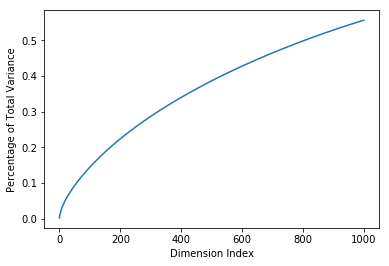

In [139]:
plt.plot(np.cumsum(svd.explained_variance_ratio_[:1000]))
plt.xlabel("Dimension Index")
plt.ylabel("Percentage of Total Variance")
plt.show()

In [112]:
# Apply K-means clustering with k=20 using the TF-IDF data. Use random_state=0, max_iter >= 1000, n_init>=30.
N_CLUSTERS = 20
RANDOM_STATE = 0
MAX_ITER = 1000
N_INIT = 30

km_20 = KMeans(n_clusters=N_CLUSTERS,random_state=RANDOM_STATE,max_iter=MAX_ITER,n_init=N_INIT)
start = time.time()
km_20.fit(X_tfidf)
print("Finished clustering with %i seeds in %f seconds" % (N_INIT, time.time()-start))

Finished clustering with 30 seeds in 576.350085 seconds


In [111]:
print("QUESTION 11: Report 5 Measures for K-Means Clustering for 20 classes\n ")
contin_matrix = metrics.cluster.contingency_matrix(dataset.target, km_20.labels_)
print("Contingency Matrix:")
print(contin_matrix)
print_cluster_metrics(dataset.target, km_20)

QUESTION 11: Report 5 Measures for K-Means Clustering for 20 classes
 
Contingency Matrix:
[[  2   0   0 377   0 302   0   0   8   0  99   1  24   0   0  57  91   0
    2  10]
 [  7   1  16 178   0  47   1   0  81   0  66  27 371   0   0  87  80   4
    3  16]
 [  0   0 145 213   2   4  86   0   9   0  71  78  37   0   1 155  61  68
    2  50]
 [ 12   0  68 244   0   2 142   0  34   0  60  46   6   0   0  18  74  31
    3 223]
 [ 23  16   3  40   0   0   0   0   0   0  42   0   2   0 436   0 414   0
   13   1]
 [ 38 588  11  21   2   0   0   0   0   0  31   0   0   0  23   0 276   0
    6   0]
 [ 45   3   0  16  58   1   0 323   0 110  50   0   0   7   0   0 223   0
  157   1]
 [  7   1   0   8 223   0   0   9   0  84  19   0   0 183   0   0  72   0
  393   0]]
Homogeneity Score: 0.504901
Completeness Score: 0.380828
V-Measure Score: 0.434174
Adjusted Rand Index: 0.233840
Adjusted Mutual Information: 0.378915


In [119]:
pickle.dump(km_2,open("km_2.pkl","wb"))
pickle.dump(km_20,open("km_20.pkl","wb"))

In [120]:
a = pickle.load(open("km_20.pkl","rb"))
b = pickle.load(open("km_2.pkl","rb"))